In [11]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.signal import lfilter
from scipy import signal
import scipy
import math
from iir_biquad import iir_biquad as iir_biquad_patrick
from iir_biquad import test as test_patrick
from IIRSim import *
from IIRSimUtils import *
from FrequencyResponse import *
from FPGATestIO import *
from scipy.special import eval_chebyu

# 8 Sample Biquad

In [12]:
SAMPLE_FREQ = 3000
x, y = np.meshgrid(np.arange(1,1490,5),np.linspace(1,20,100))
z = np.zeros((len(x),len(x[0])))
print(x.shape[0])
print(x.shape[1])
print(y.shape[0])
print(y.shape[1])
print(x)
print(y)
for q_factor_idx in range(x.shape[0]):#100
    # print(x[0][notch_idx])
    for notch_idx in range(x.shape[1]):#60
        # print("Notch: %s, Q: %s"%(x[q_factor_idx][notch_idx], y[q_factor_idx][notch_idx]))
        b, a = signal.iirnotch(x[q_factor_idx][notch_idx],y[q_factor_idx][notch_idx], SAMPLE_FREQ)
        # b, a = signal.iirnotch(520,30, SAMPLE_FREQ)
        pole = signal.tf2zpk(b,a)[1][0]
        zero = signal.tf2zpk(b,a)[0][0]
        pmag=np.abs(pole)
        pangle=np.angle(pole)
        zmag=np.abs(zero)
        zangle=np.angle(zero)


        characteristic_poly0 = [1,0,0,0,0,0,0,-1*eval_chebyu(7,np.cos(pangle))*(pmag**7),eval_chebyu(6,np.cos(pangle))*(pmag**8)] # M=7
        roots0 = np.roots(characteristic_poly0)
        cancel_mags0 = np.abs(roots0)
        cancel_angles0 = np.angle(roots0)
            
        characteristic_poly1 = [1,0,0,0,0,0,0,0,-1*eval_chebyu(8,np.cos(pangle))*(pmag**8),eval_chebyu(7,np.cos(pangle))*(pmag**9)] # M=8
        roots1 = np.roots(characteristic_poly1)
        cancel_mags1 = np.abs(roots1)
        cancel_angles1 = np.angle(roots1)

        
        characteristic_poly0 = [1,0,0,0,0,0,0,-1*eval_chebyu(7,np.cos(pangle))*(pmag**7),eval_chebyu(6,np.cos(pangle))*(pmag**8)] # M=7
        roots0 = np.roots(characteristic_poly0)
        cancel_mags0 = np.abs(roots0)
        cancel_angles0 = np.angle(roots0)
        characteristic_poly1 = [1,0,0,0,0,0,0,0,-1*eval_chebyu(8,np.cos(pangle))*(pmag**8),eval_chebyu(7,np.cos(pangle))*(pmag**9)] # M=8
        roots1 = np.roots(characteristic_poly1)
        cancel_mags1 = np.abs(roots1)
        cancel_angles1 = np.angle(roots1)
        # print(np.max(cancel_mags0))
        if (np.max(cancel_mags0)<1 and np.max(cancel_mags1)<1):
            # print("found one")
            z[q_factor_idx][notch_idx] = 1

        
        # plt.clf()
        # fig = plt.figure(num='Biquad CLA Cancels',figsize=(10,4.8))
        # ax=fig.add_subplot(1,10,(1,10),projection='polar')
        # ax.set_rlim(0,1.25)
        # poles = ax.scatter(cancel_angles0,cancel_mags0,c='blue',marker="x", s=75)
        # zeros = ax.scatter(cancel_angles1,cancel_mags1, marker="o", s=75,facecolors='none', edgecolors='blue')
        # unit_circle = ax.plot(np.linspace(0,2*np.pi,1000), np.ones(1000), color="red", linestyle="--")
        # plt.show()
        # break
       

100
298
100
298
[[   1    6   11 ... 1476 1481 1486]
 [   1    6   11 ... 1476 1481 1486]
 [   1    6   11 ... 1476 1481 1486]
 ...
 [   1    6   11 ... 1476 1481 1486]
 [   1    6   11 ... 1476 1481 1486]
 [   1    6   11 ... 1476 1481 1486]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.19191919  1.19191919  1.19191919 ...  1.19191919  1.19191919
   1.19191919]
 [ 1.38383838  1.38383838  1.38383838 ...  1.38383838  1.38383838
   1.38383838]
 ...
 [19.61616162 19.61616162 19.61616162 ... 19.61616162 19.61616162
  19.61616162]
 [19.80808081 19.80808081 19.80808081 ... 19.80808081 19.80808081
  19.80808081]
 [20.         20.         20.         ... 20.         20.
  20.        ]]


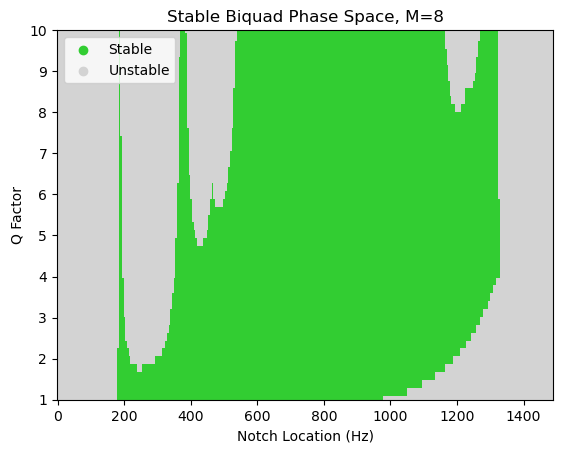

In [13]:
cMap = matplotlib.colors.ListedColormap(['lightgrey','limegreen'])
h = plt.pcolormesh(x, y, z, cmap=cMap)
# plt.axis("scaled")
# plt.colorbar()
plt.scatter([],[],color="limegreen", label="Stable")
plt.scatter([],[],color="lightgrey", label="Unstable")
plt.title("Stable Biquad Phase Space, M=8")
plt.xlabel("Notch Location (Hz)")
plt.ylabel("Q Factor")
plt.legend(loc=2)
# plt.xlim(40, 650)
plt.ylim(1, 10)
plt.savefig("001_files/images/notch_phase_space_m=8.png")
plt.show()

# 4 Sample Biquad

In [ ]:
M=4
SAMPLE_FREQ = 1500


x, y = np.meshgrid(np.arange(1,740,5),np.linspace(1,20,100))
z = np.zeros((len(x),len(x[0])))
print(x.shape[0])
print(x.shape[1])
print(y.shape[0])
print(y.shape[1])
print(x)
print(y)
for q_factor_idx in range(x.shape[0]):#100
    # print(x[0][notch_idx])
    for notch_idx in range(x.shape[1]):#60
        # print("Notch: %s, Q: %s"%(x[q_factor_idx][notch_idx], y[q_factor_idx][notch_idx]))
        b, a = signal.iirnotch(x[q_factor_idx][notch_idx],y[q_factor_idx][notch_idx], SAMPLE_FREQ)
        # b, a = signal.iirnotch(520,30, SAMPLE_FREQ)
        pole = signal.tf2zpk(b,a)[1][0]
        zero = signal.tf2zpk(b,a)[0][0]
        pmag=np.abs(pole)
        pangle=np.angle(pole)
        zmag=np.abs(zero)
        zangle=np.angle(zero)

        characteristic_poly0 = [1]
        for i in range(M-2):
            characteristic_poly0.append(0)
        characteristic_poly0.append(-1*eval_chebyu((M-1),np.cos(pangle))*(pmag**(M-1)))
        characteristic_poly0.append(eval_chebyu((M-2),np.cos(pangle))*(pmag**(M)))
        roots0 = np.roots(characteristic_poly0)
        cancel_mags0 = np.abs(roots0)
        cancel_angles0 = np.angle(roots0)

        
        characteristic_poly1 = [1]
        for i in range(M-1):
            characteristic_poly1.append(0)
        characteristic_poly1.append(-1*eval_chebyu((M),np.cos(pangle))*(pmag**(M)))
        characteristic_poly1.append(eval_chebyu((M-1),np.cos(pangle))*(pmag**(M+1)))

        # characteristic_poly1 = [1,0,0,-1*eval_chebyu(M,np.cos(pangle))*(pmag**M),eval_chebyu((M-1),np.cos(pangle))*(pmag**(M+1))] # M=8
        roots1 = np.roots(characteristic_poly1)
        cancel_mags1 = np.abs(roots1)
        cancel_angles1 = np.angle(roots1)
        # print(np.max(cancel_mags0))
        if (np.max(cancel_mags0)<1 and np.max(cancel_mags1)<1):
            # print("found one")
            z[q_factor_idx][notch_idx] = 1


       

100
148
100
148
[[  1   6  11 ... 726 731 736]
 [  1   6  11 ... 726 731 736]
 [  1   6  11 ... 726 731 736]
 ...
 [  1   6  11 ... 726 731 736]
 [  1   6  11 ... 726 731 736]
 [  1   6  11 ... 726 731 736]]
[[ 1.          1.          1.         ...  1.          1.
   1.        ]
 [ 1.19191919  1.19191919  1.19191919 ...  1.19191919  1.19191919
   1.19191919]
 [ 1.38383838  1.38383838  1.38383838 ...  1.38383838  1.38383838
   1.38383838]
 ...
 [19.61616162 19.61616162 19.61616162 ... 19.61616162 19.61616162
  19.61616162]
 [19.80808081 19.80808081 19.80808081 ... 19.80808081 19.80808081
  19.80808081]
 [20.         20.         20.         ... 20.         20.
  20.        ]]


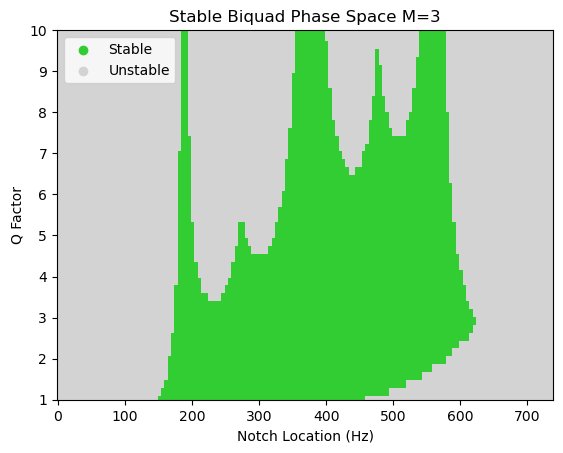

In [28]:
cMap = matplotlib.colors.ListedColormap(['lightgrey','limegreen'])
h = plt.pcolormesh(x, y, z, cmap=cMap)
# plt.axis("scaled")
# plt.colorbar()
plt.scatter([],[],color="limegreen", label="Stable")
plt.scatter([],[],color="lightgrey", label="Unstable")
plt.title("Stable Biquad Phase Space M=3")
plt.xlabel("Notch Location (Hz)")
plt.ylabel("Q Factor")
plt.legend(loc=2)
# plt.xlim(40, 650)
plt.ylim(1, 10)
plt.savefig("001_files/images/notch_phase_space_m=3.png")
plt.show()